# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [28]:
import datetime
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline

In [4]:
import pandas as pd


## Load the data into a DataFrame
# pd.read_csv()
iowa = pd.read_csv('../../../../../Project03/Iowa_liquor_sales_reduced.csv')
## Transform the dates if needed, e.g.


/Users/christophereppig/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## The Problem:

This project will use available data to create the best possible model to predict number of bottles sold per Iowan county. The best model will have a high predictive power without over-fitting.

In [5]:
iowa['Date'] = iowa['Date'].apply(str)

In [82]:
iowa.head(5)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Sale Profit,Profit Per Gallon,Price Per Gallon
0,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,...,375,9.99,14.99,12,179.88,4.5,1.19,60.00,50.420168,151.159664
1,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,...,1000,12.50,18.75,2,37.50,2.0,0.53,12.50,23.584906,70.754717
2,2016-03-31,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,...,1750,5.97,8.96,6,53.76,10.5,2.77,17.94,6.476534,19.407942
3,2016-03-31,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,...,200,2.24,3.36,48,161.28,9.6,2.54,53.76,21.165354,63.496063
4,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,...,750,12.50,18.75,6,112.50,4.5,1.19,37.50,31.512605,94.537815


In [168]:
print 'There are %s zip codes in Iowa.' % len(set(iowa['Zip Code']))

There are 771 zip codes in Iowa.


In [169]:
print "There are %s cities in Iowa." % len(set(iowa['City']))

There are 386 cities in Iowa.


In [170]:
print "There are %s stores licensed to sell liquor in Iowa." % len(set(iowa['Store Number']))

There are 1403 stores licensed to sell liquor in Iowa.


In [171]:
print "There are %s counties in Iowa." % len(set(iowa['County']))

There are 100 counties in Iowa.


In [6]:
countynas = iowa['County Number'].apply(math.isnan) # looks for NaN in "County Numer"

In [7]:
sum(countynas) # counts the number of NaN in "County Number"

10913

In [8]:
def bleach(string):
    temp = ""
    string = str(string)
    for i in string:
        if i in ["1","2","3","4","5","6","7","8","9","0", "."]:
            temp += i
    if len(temp) > 0:
        return float(temp)

In [9]:
iowa['State Bottle Cost'] = iowa['State Bottle Cost'].apply(bleach)
iowa['State Bottle Retail'] = iowa['State Bottle Retail'].apply(bleach)
iowa['Sale (Dollars)'] = iowa['Sale (Dollars)'].apply(bleach)

In [10]:
iowa['Sale Profit'] = (iowa['State Bottle Retail'] - iowa['State Bottle Cost']) * iowa['Bottles Sold']
iowa['Profit Per Gallon'] = iowa['Sale Profit'] / iowa['Volume Sold (Gallons)']
iowa['Price Per Gallon'] = iowa['Sale (Dollars)'] / iowa['Volume Sold (Gallons)']

In [11]:
iowa.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)',
       u'Sale Profit', u'Profit Per Gallon', u'Price Per Gallon'],
      dtype='object')

In [12]:
iowa['Date'] = iowa['Date'].apply(str)

In [13]:
iowa["Date"] = pd.to_datetime(iowa["Date"], format="%m/%d/%Y") ## check syntax on date. will %m/%d/%y work?

In [20]:
iowa.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Sale Profit,Profit Per Gallon,Price Per Gallon
0,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,...,375,9.99,14.99,12,179.88,4.5,1.19,60.00,50.420168,151.159664
1,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,...,1000,12.50,18.75,2,37.50,2.0,0.53,12.50,23.584906,70.754717
2,2016-03-31,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,...,1750,5.97,8.96,6,53.76,10.5,2.77,17.94,6.476534,19.407942


In [230]:
liquor_types = pd.pivot_table(iowa, index=['Category Name', 'Item Description'],
                             values=['Bottles Sold', 'Sale Profit', 'Sale (Dollars)'],
                             aggfunc=(sum))


In [231]:
liquor_types = liquor_types.reset_index()

In [233]:
liquor_types.head()

,Category Name,Item Description,Bottles Sold,Sale (Dollars),Sale Profit
0,100 PROOF VODKA,Barton Vodka,547,929.90,311.79
1,100 PROOF VODKA,Blaum Bros. Vodka,16,336.00,112.00
2,100 PROOF VODKA,Burnett's Orange,24,207.12,69.12
3,100 PROOF VODKA,Burnett's Pink Lemonade,12,176.28,58.80
4,100 PROOF VODKA,Burnett's Mango Pineapple,24,207.12,69.12


In [234]:
liquor_types.columns = ['Category Name', 'Item Description', 'Total Bottles Sold', 'Total Sales', 'Total Profit']

In [391]:
liquor_types.sort_values("Total Bottles Sold", ascending=True).head(50)

,Category Name,Item Description,Total Bottles Sold,Total Sales,Total Profit
651,DECANTERS & SPECIALTY PACKAGES,Belvedere Red,1,25.73,8.58
1027,IMPORTED GRAPE BRANDIES,Calvados Morin XO,1,70.50,23.50
1725,MISC. IMPORTED CORDIALS & LIQUEURS,Yahara Bay Lemoncello,1,60.38,20.13
390,BOTTLED IN BOND BOURBON,Jailers Tennessee Whiskey,1,23.07,7.69
1724,MISC. IMPORTED CORDIALS & LIQUEURS,Yahara Bay Apple Crisp(apple pie),1,38.61,12.87
1047,IMPORTED GRAPE BRANDIES,Grappa Moscato,1,60.33,20.11
537,COFFEE LIQUEURS,Kahlua Peppermint Mocha,1,17.99,6.00
549,CORN WHISKIES,Cedar Ridge Malted Rye Barrel Marion,1,9150.00,3050.00
550,CORN WHISKIES,Cedar Ridge Malted Rye Barrel Urbandale,1,9150.00,3050.00
551,CORN WHISKIES,Cedar Ridge Rye Whiskey - Whole Cask Buy,1,9702.00,3234.00


In [101]:
countiesVendorPivot = pd.pivot_table(iowa, index=['County', 'Store Number'])
countiesVendorPivot = countiesVendorPivot.reset_index()
countiesVendorPivot.head()

,County,Store Number,Bottle Volume (ml),Bottles Sold,Category,County Number,Item Number,Price Per Gallon,Profit Per Gallon,Sale (Dollars),Sale Profit,State Bottle Cost,State Bottle Retail,Vendor Number,Volume Sold (Gallons),Volume Sold (Liters)
0,Adair,3461,1008.862705,6.550717,1.039404e+06,1.0,43708.999488,56.422438,18.854115,77.293781,25.868560,8.815768,13.244544,264.932889,1.745523,6.612116
1,Adair,3969,1041.494845,8.175258,1.040270e+06,1.0,52356.185567,75.314807,25.115349,107.914742,35.992165,11.647320,17.476289,286.319588,2.166186,8.202577
2,Adair,4317,1058.658453,6.291581,1.041119e+06,1.0,42735.119781,55.524451,18.549783,87.550862,29.332957,9.264387,13.918371,276.466804,1.941294,7.348973
3,Adair,4417,955.978261,11.905797,1.032968e+06,1.0,31822.083333,60.928869,20.358030,136.518080,45.639457,9.036087,13.579638,263.985507,2.450906,9.273587
4,Adair,4620,1301.276408,8.779930,1.037810e+06,1.0,44160.077465,64.801862,21.638075,130.818486,43.751496,12.362887,18.567271,279.072183,2.830387,10.716778


In [102]:
countiesVendorPivot.sort_values("Store Number").head()

,County,Store Number,Bottle Volume (ml),Bottles Sold,Category,County Number,Item Number,Price Per Gallon,Profit Per Gallon,Sale (Dollars),Sale Profit,State Bottle Cost,State Bottle Retail,Vendor Number,Volume Sold (Gallons),Volume Sold (Liters)
30,Black Hawk,2106,911.035680,19.514209,1.047111e+06,7.0,59717.849069,70.847142,23.641039,279.787480,93.362513,10.744967,16.126917,259.625355,4.849771,18.355608
1297,Webster,2113,960.447548,4.667047,1.041298e+06,94.0,45287.823261,66.675431,22.254455,61.288512,20.497879,10.632919,15.963609,240.522235,1.221135,4.623090
31,Black Hawk,2130,927.014836,18.523256,1.043942e+06,7.0,53142.796512,65.885271,21.984815,283.706347,94.635431,10.251927,15.386269,256.792101,4.435104,16.787416
194,Cerro Gordo,2152,1054.295221,4.039322,1.040807e+06,17.0,39428.354507,49.881377,16.679053,49.236606,16.493787,8.690375,13.063176,245.863884,1.112819,4.213134
9,Allamakee,2178,1029.598406,7.677192,1.042614e+06,3.0,48581.587983,62.917051,21.024306,103.288737,34.621343,10.068841,15.127811,252.951870,2.132100,8.070549


In [91]:
countiesVendorPivot.sort_values('County').head()

,County,Vendor Number,Bottle Volume (ml),Bottles Sold,Category,County Number,Item Number,Price Per Gallon,Profit Per Gallon,Sale (Dollars),Sale Profit,State Bottle Cost,State Bottle Retail,Store Number,Volume Sold (Gallons),Volume Sold (Liters)
0,Adair,35,931.475904,4.825301,1.052493e+06,1.0,37943.674699,74.875159,25.026108,80.228373,26.881566,11.112229,16.701325,4161.626506,1.225181,4.639940
25,Adair,301,908.536585,4.707317,1.031082e+06,1.0,38176.341463,71.043319,23.694675,80.857073,26.963415,11.058780,16.592195,3890.390244,1.182439,4.481707
26,Adair,305,705.357143,7.607143,1.078762e+06,1.0,71894.571429,93.384805,31.133447,128.401786,42.802143,11.468571,17.203929,4348.000000,1.406429,5.321429
27,Adair,306,750.000000,2.166667,1.022810e+06,1.0,31617.833333,127.876257,42.636612,57.698333,19.238333,16.953333,25.433333,4367.000000,0.430000,1.625000
28,Adair,322,770.833333,4.208333,1.074370e+06,1.0,69970.187500,71.646832,23.882277,62.641875,20.880625,9.667500,14.501250,4056.437500,0.867708,3.281250


In [206]:
countiesAverages = pd.pivot_table(iowa, index=['County'],
                                 values =['Bottle Volume (ml)', 'State Bottle Retail'],
                                 aggfunc=(np.mean))
countiesAverages.head()

,Bottle Volume (ml),State Bottle Retail
County,,
Adair,1006.737843,13.739184
Adams,994.086161,15.302268
Allamakee,1060.234696,14.937870
Appanoose,974.081146,14.404090
Audubon,1022.390950,12.976996


In [208]:
countiesAverages = countiesAverages.reset_index()

In [209]:
countiesAverages.columns = ['County', 'Average Bottle Volume', 'Average Bottle Price']
countiesAverages.head()

,County,Average Bottle Volume,Average Bottle Price
0,Adair,1006.737843,13.739184
1,Adams,994.086161,15.302268
2,Allamakee,1060.234696,14.937870
3,Appanoose,974.081146,14.404090
4,Audubon,1022.390950,12.976996


In [103]:
countiesVendorPivot2 = pd.pivot_table(countiesVendorPivot, index=['County'], values=['Store Number'], aggfunc=(len))
countiesVendorPivot2 = countiesVendorPivot2.reset_index()
countiesVendorPivot2.head()


,County,Store Number
0,Adair,8
1,Adams,1
2,Allamakee,6
3,Appanoose,6
4,Audubon,3


In [108]:
countiesVendorPivot2.columns = ['County', 'Number of Stores']

In [109]:
countiesVendorPivot2.head(25)

,County,Number of Stores
0,Adair,8
1,Adams,1
2,Allamakee,6
3,Appanoose,6
4,Audubon,3
5,Benton,6
6,Black Hawk,73
7,Boone,15
8,Bremer,9
9,Buchanan,10


In [110]:
sum(countiesVendorPivot2['Number of Stores'])

1380

In [151]:
# maybe don't use bottles sold and state bottle retail here
countiesProfitPivot = pd.pivot_table(iowa, index=['County'],
                             values=['Sale Profit','Bottles Sold', 'State Bottle Retail', ],
                             aggfunc=(sum))
countiesProfitPivot = countiesProfitPivot.reset_index()
countiesProfitPivot.columns = ['County', 'Bottles Sold', 'SumProfit', 'Total Bottle Retail']


In [376]:
countiesProfitPivot.sort_values("Bottles Sold", ascending=False).head(10)

,County,Bottles Sold,SumProfit,Total Bottle Retail
76,Polk,5818078,2.621364e+07,7.546130e+06
56,Linn,2421390,1.031109e+07,3.350986e+06
81,Scott,2045563,8.357573e+06,2.420137e+06
6,Black Hawk,1735197,6.648537e+06,2.133624e+06
51,Johnson,1527109,7.202983e+06,2.097862e+06
77,Pottawattamie,951506,4.148367e+06,1.300927e+06
96,Woodbury,939206,4.123710e+06,1.277224e+06
30,Dubuque,779839,3.565410e+06,1.147811e+06
84,Story,770265,3.541601e+06,1.381440e+06
16,Cerro Gordo,550337,2.355573e+06,9.657233e+05


In [153]:
countiesProfitVendorJoin  = pd.merge(countiesVendorPivot2, countiesProfitPivot, on='County')

In [154]:
countiesProfitVendorJoin['Profit Per Vendor'] = countiesProfitVendorJoin['SumProfit'] / countiesProfitVendorJoin['Number of Stores']

In [155]:
countiesProfitVendorJoin.sort_values('Profit Per Vendor', ascending=False).head()

,County,Number of Stores,Bottles Sold,SumProfit,Total Bottle Retail,Profit Per Vendor
51,Johnson,53,1527109,7.202983e+06,2.097862e+06,135905.340377
24,Dallas,17,374922,2.213984e+06,4.124453e+05,130234.345294
76,Polk,207,5818078,2.621364e+07,7.546130e+06,126635.942512
81,Scott,67,2045563,8.357573e+06,2.420137e+06,124739.888507
16,Cerro Gordo,20,550337,2.355573e+06,9.657233e+05,117778.665000


In [116]:
countiesProfitVendorJoin.describe()

,Number of Stores,SumProfit,Profit Per Vendor
count,99.000000,9.900000e+01,99.000000
mean,13.939394,1.177198e+06,58576.577569
std,25.033373,3.065236e+06,30064.707897
min,1.000000,9.940240e+03,9940.240000
25%,5.000000,1.830150e+05,32089.905857
50%,7.000000,3.452164e+05,54401.570000
75%,12.500000,7.265732e+05,80111.910357
max,207.000000,2.621364e+07,135905.340377


In [156]:
countiesProfitVendorJoin['Quartile'] = countiesProfitVendorJoin['Profit Per Vendor']

In [157]:
countiesProfitVendorJoin.head(5)

,County,Number of Stores,Bottles Sold,SumProfit,Total Bottle Retail,Profit Per Vendor,Quartile
0,Adair,8,43503,177416.35,76568.47,22177.043750,22177.043750
1,Adams,1,10173,40908.67,34277.08,40908.670000,40908.670000
2,Allamakee,6,74610,336293.58,160074.22,56048.930000,56048.930000
3,Appanoose,6,81618,338571.27,150882.84,56428.545000,56428.545000
4,Audubon,3,18552,70731.86,31832.57,23577.286667,23577.286667


In [144]:
def makeQuartile(x):
    if x < 32090:
        return 1
    elif (x >= 32090) & (x < 54402):
        return 2
    elif (x >= 54402) & (x < 80112):
        return 3
    else:
        return 4

In [158]:
countiesProfitVendorJoin['Quartile'] = countiesProfitVendorJoin['Quartile'].apply(makeQuartile)

In [159]:
countiesProfitVendorJoin.sort_values('Quartile', ascending=False).head(15)

,County,Number of Stores,Bottles Sold,SumProfit,Total Bottle Retail,Profit Per Vendor,Quartile
56,Linn,101,2421390,1.031109e+07,3.350986e+06,102090.019109,4
63,Marshall,15,283493,1.266260e+06,4.433484e+05,84417.301333,4
29,Dickinson,15,327118,1.546171e+06,5.309779e+05,103078.084000,4
24,Dallas,17,374922,2.213984e+06,4.124453e+05,130234.345294,4
23,Crawford,6,108825,5.189021e+05,1.714620e+05,86483.690000,4
22,Clinton,17,341921,1.389838e+06,4.780590e+05,81755.190000,4
82,Shelby,4,71154,3.204517e+05,9.967620e+04,80112.935000,4
43,Henry,5,100511,4.452695e+05,1.597518e+05,89053.900000,4
44,Howard,3,55932,2.714828e+05,8.977945e+04,90494.266667,4
30,Dubuque,40,779839,3.565410e+06,1.147811e+06,89135.256000,4


In [384]:
countiesProfitVendorJoin['Bottles per Vendor'] = countiesProfitVendorJoin['Bottles Sold'] / countiesProfitVendorJoin['Number of Stores']
countiesProfitVendorJoin.head(5)

,County,Number of Stores,Bottles Sold,SumProfit,Total Bottle Retail,Profit Per Vendor,Quartile,Bottles per Vendor
0,Adair,8,43503,177416.35,76568.47,22177.043750,1,5437.875
1,Adams,1,10173,40908.67,34277.08,40908.670000,2,10173.000
2,Allamakee,6,74610,336293.58,160074.22,56048.930000,3,12435.000
3,Appanoose,6,81618,338571.27,150882.84,56428.545000,3,13603.000
4,Audubon,3,18552,70731.86,31832.57,23577.286667,1,6184.000


In [386]:
topQuartile = countiesProfitVendorJoin[(countiesProfitVendorJoin['Quartile'] == 4)]
topQuartile.head()

,County,Number of Stores,Bottles Sold,SumProfit,Total Bottle Retail,Profit Per Vendor,Quartile,Bottles per Vendor
6,Black Hawk,73,1735197,6.648537e+06,2.133624e+06,91075.847260,4,23769.821918
8,Bremer,9,159127,7.269718e+05,3.264211e+05,80774.638889,4,17680.777778
16,Cerro Gordo,20,550337,2.355573e+06,9.657233e+05,117778.665000,4,27516.850000
22,Clinton,17,341921,1.389838e+06,4.780590e+05,81755.190000,4,20113.000000
23,Crawford,6,108825,5.189021e+05,1.714620e+05,86483.690000,4,18137.500000


In [390]:
print "Average Bottles per Top-Quartile Vendor: ", np.mean(topQuartile['Bottles per Vendor'])
print "Average Profit per Top-Quartile Vendor: ", np.mean(topQuartile['Profit Per Vendor'])

Average Bottles per Top-Quartile Vendor:  21959.4643222
Average Profit per Top-Quartile Vendor:  99121.3332569


In [177]:
countyQuartileDummies = pd.get_dummies(countiesProfitVendorJoin['Quartile'])
countyQuartileDummies.columns = ["Q1", "Q2", "Q3", "Q4"]
countyQuartileDummies.head()

,Q1,Q2,Q3,Q4
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0


In [179]:
finalCounty = pd.concat([countiesProfitVendorJoin, countyQuartileDummies], axis=1)
finalCounty.head()

,County,Number of Stores,Bottles Sold,SumProfit,Total Bottle Retail,Profit Per Vendor,Quartile,Q1,Q2,Q3,Q4
0,Adair,8,43503,177416.35,76568.47,22177.043750,1,1.0,0.0,0.0,0.0
1,Adams,1,10173,40908.67,34277.08,40908.670000,2,0.0,1.0,0.0,0.0
2,Allamakee,6,74610,336293.58,160074.22,56048.930000,3,0.0,0.0,1.0,0.0
3,Appanoose,6,81618,338571.27,150882.84,56428.545000,3,0.0,0.0,1.0,0.0
4,Audubon,3,18552,70731.86,31832.57,23577.286667,1,1.0,0.0,0.0,0.0


In [210]:
finalJoin  = pd.merge(finalCounty, countiesAverages, on='County')
finalJoin.head()

,County,Number of Stores,Bottles Sold,SumProfit,Total Bottle Retail,Profit Per Vendor,Quartile,Q1,Q2,Q3,Q4,Average Bottle Volume,Average Bottle Price
0,Adair,8,43503,177416.35,76568.47,22177.043750,1,1.0,0.0,0.0,0.0,1006.737843,13.739184
1,Adams,1,10173,40908.67,34277.08,40908.670000,2,0.0,1.0,0.0,0.0,994.086161,15.302268
2,Allamakee,6,74610,336293.58,160074.22,56048.930000,3,0.0,0.0,1.0,0.0,1060.234696,14.937870
3,Appanoose,6,81618,338571.27,150882.84,56428.545000,3,0.0,0.0,1.0,0.0,974.081146,14.404090
4,Audubon,3,18552,70731.86,31832.57,23577.286667,1,1.0,0.0,0.0,0.0,1022.390950,12.976996


In [244]:
finalJoin['Bottles Sold'] = finalJoin['Bottles Sold'].apply(float)

In [247]:
finalJoin['Log Bottles Sold'] = finalJoin['Bottles Sold'].apply(math.log)

In [248]:
finalJoin.head()

,County,Number of Stores,Bottles Sold,SumProfit,Total Bottle Retail,Profit Per Vendor,Quartile,Q1,Q2,Q3,Q4,Average Bottle Volume,Average Bottle Price,Log Bottles Sold
0,Adair,8,43503.0,177416.35,76568.47,22177.043750,1,1.0,0.0,0.0,0.0,1006.737843,13.739184,10.680585
1,Adams,1,10173.0,40908.67,34277.08,40908.670000,2,0.0,1.0,0.0,0.0,994.086161,15.302268,9.227492
2,Allamakee,6,74610.0,336293.58,160074.22,56048.930000,3,0.0,0.0,1.0,0.0,1060.234696,14.937870,11.220030
3,Appanoose,6,81618.0,338571.27,150882.84,56428.545000,3,0.0,0.0,1.0,0.0,974.081146,14.404090,11.309805
4,Audubon,3,18552.0,70731.86,31832.57,23577.286667,1,1.0,0.0,0.0,0.0,1022.390950,12.976996,9.828333


In [195]:
finalJoin['Average Gallon Price'].describe()

count    99.000000
mean           inf
std            NaN
min      51.044544
25%      58.882291
50%      62.800460
75%      66.351598
max            inf
Name: Average Gallon Price, dtype: float64

In [324]:
finalJoin['Quartile'].value_counts()

4    25
2    25
1    25
3    24
Name: Quartile, dtype: int64

In [343]:
countyDummies = pd.get_dummies(countiesProfitVendorJoin['County'])
countyDummies.head()

,Adair,Adams,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,Buchanan,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [344]:
finalJoin2 = pd.concat([finalJoin, countyDummies], axis=1)
finalJoin2.head()



,County,Number of Stores,Bottles Sold,SumProfit,Total Bottle Retail,Profit Per Vendor,Quartile,Q1,Q2,Q3,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
0,Adair,8,43503.0,177416.35,76568.47,22177.043750,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adams,1,10173.0,40908.67,34277.08,40908.670000,2,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Allamakee,6,74610.0,336293.58,160074.22,56048.930000,3,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Appanoose,6,81618.0,338571.27,150882.84,56428.545000,3,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Audubon,3,18552.0,70731.86,31832.57,23577.286667,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [345]:
finalJoin2.columns

Index([u'County', u'Number of Stores', u'Bottles Sold', u'SumProfit',
       u'Total Bottle Retail', u'Profit Per Vendor', u'Quartile', u'Q1', u'Q2',
       u'Q3',
       ...
       u'Wapello', u'Warren', u'Washington', u'Wayne', u'Webster',
       u'Winnebago', u'Winneshiek', u'Woodbury', u'Worth', u'Wright'],
      dtype='object', length=113)

In [348]:
finalJoin2.shape

(99, 113)

In [353]:
colnames = list(finalJoin2.columns.values)

In [363]:
countyNames = colnames[14:]
countyNames

['Adair',
 'Adams',
 'Allamakee',
 'Appanoose',
 'Audubon',
 'Benton',
 'Black Hawk',
 'Boone',
 'Bremer',
 'Buchanan',
 'Buena Vista',
 'Butler',
 'Calhoun',
 'Carroll',
 'Cass',
 'Cedar',
 'Cerro Gordo',
 'Cherokee',
 'Chickasaw',
 'Clarke',
 'Clay',
 'Clayton',
 'Clinton',
 'Crawford',
 'Dallas',
 'Davis',
 'Decatur',
 'Delaware',
 'Des Moines',
 'Dickinson',
 'Dubuque',
 'Emmet',
 'Fayette',
 'Floyd',
 'Franklin',
 'Fremont',
 'Greene',
 'Grundy',
 'Guthrie',
 'Hamilton',
 'Hancock',
 'Hardin',
 'Harrison',
 'Henry',
 'Howard',
 'Humboldt',
 'Ida',
 'Iowa',
 'Jackson',
 'Jasper',
 'Jefferson',
 'Johnson',
 'Jones',
 'Keokuk',
 'Kossuth',
 'Lee',
 'Linn',
 'Louisa',
 'Lucas',
 'Lyon',
 'Madison',
 'Mahaska',
 'Marion',
 'Marshall',
 'Mills',
 'Mitchell',
 'Monona',
 'Monroe',
 'Montgomery',
 'Muscatine',
 "O'Brien",
 'Osceola',
 'Page',
 'Palo Alto',
 'Plymouth',
 'Pocahontas',
 'Polk',
 'Pottawattamie',
 'Poweshiek',
 'Ringgold',
 'Sac',
 'Scott',
 'Shelby',
 'Sioux',
 'Story',
 'T

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.hist(countiesProfitVendorJoin['Profit Per Vendor'])
plt.title("Histogram of Profits per Store")
plt.xlabel('Profit')
plt.ylabel('Frequency')

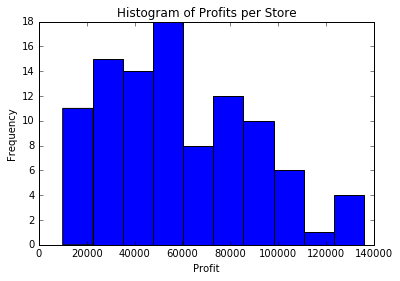

In [292]:
plt.hist(countiesProfitVendorJoin['Profit Per Vendor'])
plt.title("Histogram of Profits per Store")
plt.xlabel('Profit')
plt.ylabel('Frequency')

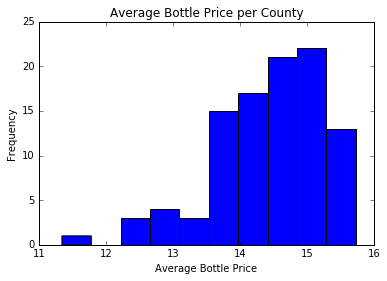

In [310]:
plt.hist(finalJoin['Average Bottle Price'])
plt.title("Average Bottle Price per County")
plt.xlabel("Average Bottle Price")
plt.ylabel("Frequency")

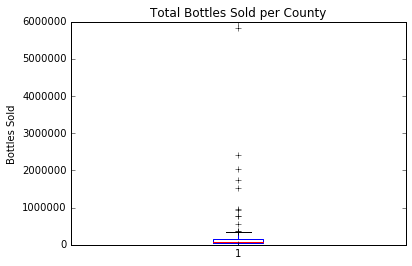

In [321]:
plt.boxplot(finalJoin['Bottles Sold'])
plt.title("Total Bottles Sold per County")
plt.ylabel("Bottles Sold")

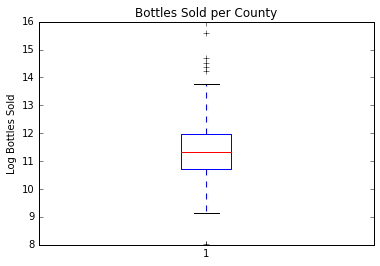

In [327]:
plt.boxplot(finalJoin['Log Bottles Sold'])
plt.title("Bottles Sold per County")
plt.ylabel("Log Bottles Sold")

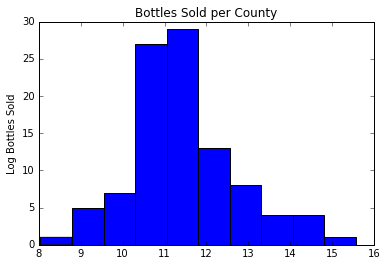

In [326]:
plt.hist(finalJoin['Log Bottles Sold'])
plt.title("Bottles Sold per County")
plt.ylabel("Log Bottles Sold")

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

[[ 1.          0.99057345]
 [ 0.99057345  1.        ]]


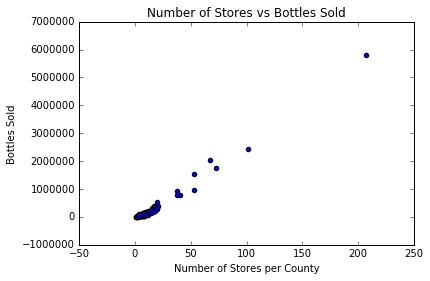

In [330]:
print np.corrcoef(finalJoin['Number of Stores'], finalJoin['Bottles Sold'])
plt.scatter(finalJoin['Number of Stores'], finalJoin['Bottles Sold'])
plt.title("Number of Stores vs Bottles Sold")
plt.ylabel('Bottles Sold')
plt.xlabel('Number of Stores per County')

[[ 1.         -0.39570326]
 [-0.39570326  1.        ]]


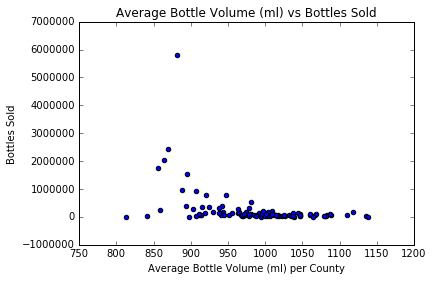

In [338]:
print np.corrcoef(finalJoin['Average Bottle Volume'], finalJoin['Bottles Sold'])
plt.scatter(finalJoin['Average Bottle Volume'], finalJoin['Bottles Sold'])
plt.title("Average Bottle Volume (ml) vs Bottles Sold")
plt.ylabel('Bottles Sold')
plt.xlabel('Average Bottle Volume (ml) per County')

[[ 1.         -0.42856847]
 [-0.42856847  1.        ]]


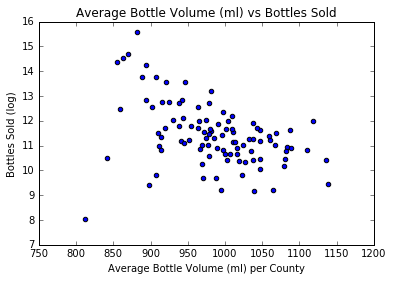

In [339]:
print np.corrcoef(finalJoin['Average Bottle Volume'], finalJoin['Log Bottles Sold'])
plt.scatter(finalJoin['Average Bottle Volume'], finalJoin['Log Bottles Sold'])
plt.title("Average Bottle Volume (ml) vs Bottles Sold")
plt.ylabel('Bottles Sold (log)')
plt.xlabel('Average Bottle Volume (ml) per County')

[[ 1.          0.99860873]
 [ 0.99860873  1.        ]]


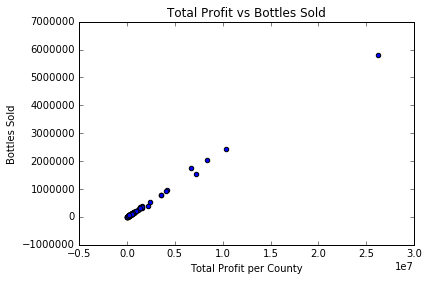

In [333]:
plt.scatter(finalJoin['SumProfit'], finalJoin['Bottles Sold'])
plt.title("Total Profit vs Bottles Sold")
plt.ylabel('Bottles Sold')
plt.xlabel('Total Profit per County')

print np.corrcoef(finalJoin['SumProfit'], finalJoin['Bottles Sold'])

[[ 1.          0.25514167]
 [ 0.25514167  1.        ]]


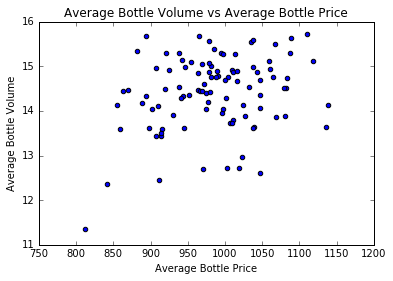

In [334]:
print np.corrcoef(finalJoin['Average Bottle Volume'], finalJoin['Average Bottle Price'])

plt.scatter(finalJoin['Average Bottle Volume'], finalJoin['Average Bottle Price'])
plt.title("Average Bottle Volume vs Average Bottle Price")
plt.ylabel('Average Bottle Volume')
plt.xlabel('Average Bottle Price')

[[ 1.         -0.38575796]
 [-0.38575796  1.        ]]


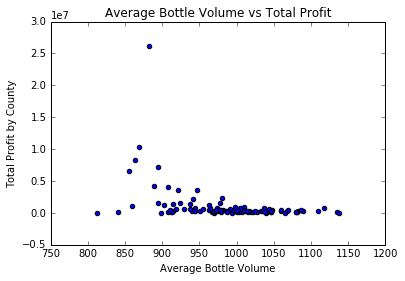

In [341]:
print np.corrcoef(finalJoin['SumProfit'], finalJoin['Average Bottle Volume'])

plt.scatter(finalJoin['Average Bottle Volume'], finalJoin['SumProfit'])
plt.title("Average Bottle Volume vs Total Profit")
plt.ylabel('Total Profit by County')
plt.xlabel('Average Bottle Volume')

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [160]:
from sklearn import linear_model
import statsmodels.api as sm

# Model 1

The following model predicts the total number of bottles sold in a county based on three categories of variables:
- Average bottle volume is the average volume of all of the bottles sold in the county
- Average bottle price is the average price of all of the bottles sold in the county
- Q1, Q2, Q3, and Q4 are dummy variables which reflect which quartile the county is in with regards to the average profit per store in the county.

### Variables that I could not use:
 - Number of stores per county. Presumably, number of stores per county is a measure of demand for liquor, as is number of bottles sold. Using demand to predict demand is unhelpful. 
 - Volume sold. Bottles sold is just another measure of volume sold, so volume sold cannot be used to predict bottles sold. 

                            OLS Regression Results                            
Dep. Variable:           Bottles Sold   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     7.765
Date:                Sat, 15 Oct 2016   Prob (F-statistic):           3.85e-06
Time:                        14:01:30   Log-Likelihood:                -1454.1
No. Observations:                  99   AIC:                             2920.
Df Residuals:                      93   BIC:                             2936.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Q1                      1.44e+

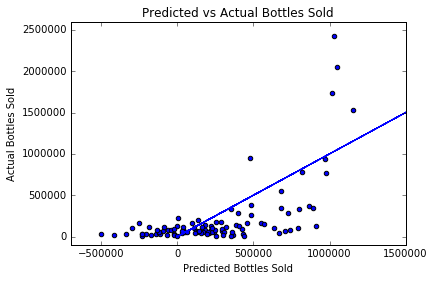

In [278]:

w = finalJoin[["Q1", "Q2", "Q3", "Q4", "Average Bottle Volume", "Average Bottle Price"]]
z = finalJoin["Bottles Sold"]

model_1 = sm.OLS(z, w).fit()
predictions1 = model_1.predict(w)
print model_1.summary()
plt.scatter(predictions1, z)
plt.plot(z, z)
plt.xlim(-700000, 1500000)
plt.ylim(-100000, 2600000)
plt.xlabel("Predicted Bottles Sold")
plt.ylabel("Actual Bottles Sold")
plt.title("Predicted vs Actual Bottles Sold")

# Model 2

Model 1 had an r-squared of 0.295. That is not especially predictive, but the graph of expected vs actual points shows a strongly non-linear relationship. The relationship could potentially be improved by log-transforming bottles sold. 
Model 2 contains the same predictor variables as model 1, but the outcome (Bottles Sold) has been log-transformed.

                            OLS Regression Results                            
Dep. Variable:       Log Bottles Sold   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     25.97
Date:                Sat, 15 Oct 2016   Prob (F-statistic):           2.55e-16
Time:                        14:01:16   Log-Likelihood:                -121.66
No. Observations:                  99   AIC:                             255.3
Df Residuals:                      93   BIC:                             270.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Q1                       11.99

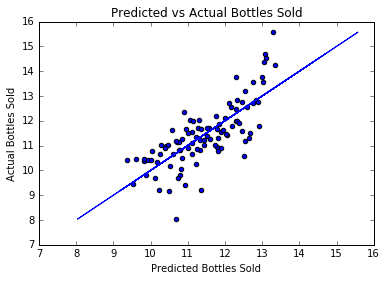

In [277]:

X = finalJoin[["Q1", "Q2", "Q3", "Q4", "Average Bottle Volume", "Average Bottle Price"]]
y = finalJoin["Log Bottles Sold"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print model.summary()
plt.scatter(predictions, y)
plt.plot(y, y)
plt.xlabel("Predicted Bottles Sold")
plt.ylabel("Actual Bottles Sold")
plt.title("Predicted vs Actual Bottles Sold")

## Model 3: Test/Train/Split

In the following model, I use the variables from models 1 and 2 with a 50% training sample. This model uses Ridge normalization.

In [342]:
subset = finalJoin.sample(frac=0.5, replace=False)

xs = subset[["Q1", "Q2", "Q3", "Q4", "Average Bottle Volume", "Average Bottle Price"]]
ys = subset["Log Bottles Sold"]

lm = linear_model.RidgeCV()
modelTTS = lm.fit(xs, ys)
predictionsTTS = modelTTS.predict(xs)
print "Sample:", modelTTS.score(xs, ys)

#apply to whole dataset
x_whole = finalJoin[["Q1", "Q2", "Q3", "Q4", "Average Bottle Volume", "Average Bottle Price"]]
y_whole = finalJoin["Log Bottles Sold"]
print "All data with sample model:", modelTTS.score(x_whole, y_whole)



Sample: 0.588893722456
All data with sample model: 0.544967600413


In [377]:
predictionsTTS

array([ 11.24972829,  10.91344823,  10.7615761 ,  10.56445527,
        13.28937462,   9.62753164,  10.55383928,  12.14275614,
        10.40869952,  11.29205802,  11.53916299,   9.97114322,
        11.98851976,  10.01318947,  10.25493547,  10.86104628,
        10.89430136,  10.21631885,  12.31086471,  12.14369294,
        11.94673813,  12.30956963,  10.70198391,  11.56277242,
        10.85536867,  12.11001748,  12.31800109,  11.11623399,
         9.57308033,  12.26427637,  12.2612235 ,  11.33070752,
         9.99074765,   9.74917392,  10.98461009,  10.72019512,
        12.08869441,  10.95405449,  11.77150252,  10.92282457,
        11.95927189,  10.69821356,  11.36485696,  11.45323275,
        10.81278239,  12.63612157,  11.65936295,  10.1998013 ,
        10.3317311 ,  12.19525037])

## Model 4

Models 1-3 used clusters of counties to make the models more human-readable. This model uses dummy variables for each county name to improve model accuracy, at the expense of readability. All other variables form previous models are used. 

In [374]:
subset4 = finalJoin2.sample(frac=0.5, replace=False)

xs4 = subset4[['Adair', 'Adams', 'Allamakee', 'Appanoose', 'Audubon', 'Benton', 
               'Black Hawk', 'Boone', 'Bremer', 'Buchanan', 'Buena Vista', 'Butler', 
               'Calhoun', 'Carroll', 'Cass', 'Cedar','Cerro Gordo', 'Cherokee', 'Chickasaw', 
               'Clarke', 'Clay', 'Clayton', 'Clinton', 'Crawford', 'Dallas', 'Davis', 
               'Decatur', 'Delaware', 'Des Moines', 'Dickinson', 'Dubuque', 'Emmet', 
               'Fayette', 'Floyd', 'Franklin', 'Fremont', 'Greene', 'Grundy', 'Guthrie', 
               'Hamilton', 'Hancock', 'Hardin', 'Harrison', 'Henry', 'Howard', 'Humboldt', 
               'Ida', 'Iowa', 'Jackson', 'Jasper', 'Jefferson', 'Johnson', 'Jones', 'Keokuk', 
               'Kossuth', 'Lee', 'Linn', 'Louisa', 'Lucas', 'Lyon', 'Madison', 'Mahaska', 
               'Marion', 'Marshall', 'Mills', 'Mitchell', 'Monona', 'Monroe', 'Montgomery', 
               'Muscatine', "O'Brien", 'Osceola', 'Page', 'Palo Alto', 'Plymouth', 'Pocahontas', 
               'Polk', 'Pottawattamie', 'Poweshiek', 'Ringgold', 'Sac', 'Scott', 'Shelby', 'Sioux', 
               'Story', 'Tama', 'Taylor', 'Union', 'Van Buren', 'Wapello', 'Warren', 'Washington', 
               'Wayne', 'Webster', 'Winnebago', 'Winneshiek', 'Woodbury', 'Worth', 'Wright', 
               "Average Bottle Volume", "Average Bottle Price"]]
ys4 = subset4["Log Bottles Sold"]

lm4 = linear_model.RidgeCV()
model4 = lm4.fit(xs4, ys4)
predictions4 = model4.predict(xs4)
print "Sample:", model4.score(xs4, ys4)

#apply to whole dataset
x_whole4 = finalJoin2[['Adair', 'Adams', 'Allamakee', 'Appanoose', 'Audubon', 'Benton', 
               'Black Hawk', 'Boone', 'Bremer', 'Buchanan', 'Buena Vista', 'Butler', 
               'Calhoun', 'Carroll', 'Cass', 'Cedar','Cerro Gordo', 'Cherokee', 'Chickasaw', 
               'Clarke', 'Clay', 'Clayton', 'Clinton', 'Crawford', 'Dallas', 'Davis', 
               'Decatur', 'Delaware', 'Des Moines', 'Dickinson', 'Dubuque', 'Emmet', 
               'Fayette', 'Floyd', 'Franklin', 'Fremont', 'Greene', 'Grundy', 'Guthrie', 
               'Hamilton', 'Hancock', 'Hardin', 'Harrison', 'Henry', 'Howard', 'Humboldt', 
               'Ida', 'Iowa', 'Jackson', 'Jasper', 'Jefferson', 'Johnson', 'Jones', 'Keokuk', 
               'Kossuth', 'Lee', 'Linn', 'Louisa', 'Lucas', 'Lyon', 'Madison', 'Mahaska', 
               'Marion', 'Marshall', 'Mills', 'Mitchell', 'Monona', 'Monroe', 'Montgomery', 
               'Muscatine', "O'Brien", 'Osceola', 'Page', 'Palo Alto', 'Plymouth', 'Pocahontas', 
               'Polk', 'Pottawattamie', 'Poweshiek', 'Ringgold', 'Sac', 'Scott', 'Shelby', 'Sioux', 
               'Story', 'Tama', 'Taylor', 'Union', 'Van Buren', 'Wapello', 'Warren', 'Washington', 
               'Wayne', 'Webster', 'Winnebago', 'Winneshiek', 'Woodbury', 'Worth', 'Wright', 
               "Average Bottle Volume", "Average Bottle Price"]]
y_whole4 = finalJoin2["Log Bottles Sold"]
print "All data with sample model:", model4.score(x_whole4, y_whole4)

Sample: 0.995473336373
All data with sample model: 0.697111921163


## Model 4 results

Model 4 is more accurate than previous models, with a final r-squared in the area of 0.7. However, the large difference between the training model and the full model suggest that there is a fairly severe over-fit problem. 

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

## Conclusions

Of the four models, models 3 and 4 are the best. Although model 4 has a higher r-squared than model 3 (and is therefore better at predicting bottles sold), model 3 has a more appropriate level of fit. 

The best locations for a new liquor store are the 25 counties that have the highest average earnings per store. Adding an additional store in one of these locations will likely yield a higher average profit and a higher number of bottles sold than the other counties. The top 10 counties recommended by this model are: Polk, Linn, Scott, Black HAwk, Johnson, Pottawattamie, Woodbury, Duboque, Story, and Cerro Gordo. 
State-wide, the top selling liquors are: Black Velvet, Hawkeye Vodka, Captain Morgan Spiced Rum, Five O’clock Vodka, Fireball Cinnamon Whiskey, Jack Daniels Old #7 Black Label, Barton Vodka, McCormick Vodka Pet, Smirnoff Vodka 90 Proof, Absolut Swedish Vodka 80 Proof. Black Velvet is the most popular by a wide margin, with nearly a half-million more bottles sold than the next most popular. 
The average bottles sold per store and annual earnings per store for the top quartile counties are: 21959 and $99121, respectively. These are the recommended sales targets to be competitive in the top-selling locations. 


## Future Directions

This model could be improved by additional data. Population at the county, city, or zip code level would help predict the size of the potential market in an area. Other demographic information could also be useful, including age, education, income, religiosity, etc. 
This analysis could be repeated on the current dataset at higher resolution--either at the city or zip code level. This could concievably (but not necessarily) improve model accuracy.

With additional data, a similar dataset could be used for many more analyses. 
- With population data, the average level of drinking per person could be computed on the regional level. This could be used to estimate rates of problem drinking, or of the health consequences associated with alcohol consumption.
- Spikes in alcohol sales could be compared to the dates of important events for high school students, such as graduation or prom. This could help direct efforts to curb teenage drinking, and prevent accidents.
- Similarly, sales of alcohol types that are popular among teenagers (e.g. Joose) could be used to predict areas where teenage drinking is highest.
- It may be possible to predict retailers who are not in compliance with laws on sales reporting or taxes. If certain stores report lower sales than would be predicted by a good model, it may mean that they are not following the law.
- Marketing efforts could be improved by determining what days of the week have higher alcohol sales, or what types of alcohol are more popular at different times of the year. For example, tequila sales may go up on May 4th, Champagne on December 30th, and cheep beer before the world series. 


## Executive Summary

The purpose of this analysis is to build a model for predicting the number of bottles of liquor sold in a county, in order to inform the placement and strategy for a new store. The attached models are able to predict between 50% and 70% of the variation in number of bottles sold annually. 
The four major findings of this model are:
- The best locations for a new store are in Polk, Linn, Scott, Black Hawk, and Johnson Counties.
- Counties that have higher sales also support higher average bottle price. 
- Small bottles are sold more frequently than large bottles.
- The most popular liquors are Black Velvet, Hawkeye Vodka, Captain Morgan Spiced Rum, Five O'clock Vodka, and Fireball Cinnamon Whiskey. 

Target sales are 21959 bottles and $99121 anually. These are the recommended sales targets to be competitive in the top-selling locations. 

